In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train  = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)

In [3]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
t=train.copy()

In [5]:
train=train[train['TotalCharges']!=' ']
train['TotalCharges']=train["TotalCharges"].astype(float)

<ipython-input-5-385c17c9750a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TotalCharges']=train["TotalCharges"].astype(float)


In [6]:
train=train.drop('customerID', axis=1)

In [7]:
dicc=train.dtypes.to_dict()

In [8]:
dicc

{'gender': dtype('O'),
 'SeniorCitizen': dtype('int64'),
 'Partner': dtype('O'),
 'Dependents': dtype('O'),
 'tenure': dtype('int64'),
 'PhoneService': dtype('O'),
 'MultipleLines': dtype('O'),
 'InternetService': dtype('O'),
 'OnlineSecurity': dtype('O'),
 'OnlineBackup': dtype('O'),
 'DeviceProtection': dtype('O'),
 'TechSupport': dtype('O'),
 'StreamingTV': dtype('O'),
 'StreamingMovies': dtype('O'),
 'Contract': dtype('O'),
 'PaperlessBilling': dtype('O'),
 'PaymentMethod': dtype('O'),
 'MonthlyCharges': dtype('float64'),
 'TotalCharges': dtype('float64'),
 'Churn': dtype('O')}

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
labelEncoder = LabelEncoder()

In [11]:
for column,type in dicc.items():
    if type=='O':
        train[column] = labelEncoder.fit_transform(train[column])

In [12]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [13]:
train=train[train['Churn']==1]
train=train.drop("Churn",axis=1)

In [14]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [36]:
x=train.copy()
x=x.drop("tenure",axis=1)
y=train.iloc[:,[4]]

In [37]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
8,0,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05
13,1,0,0,0,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30


In [38]:
y.head()

,tenure
2,2
4,2
5,8
8,28
13,49


In [39]:
dicc

{'gender': dtype('O'),
 'SeniorCitizen': dtype('int64'),
 'Partner': dtype('O'),
 'Dependents': dtype('O'),
 'tenure': dtype('int64'),
 'PhoneService': dtype('O'),
 'MultipleLines': dtype('O'),
 'InternetService': dtype('O'),
 'OnlineSecurity': dtype('O'),
 'OnlineBackup': dtype('O'),
 'DeviceProtection': dtype('O'),
 'TechSupport': dtype('O'),
 'StreamingTV': dtype('O'),
 'StreamingMovies': dtype('O'),
 'Contract': dtype('O'),
 'PaperlessBilling': dtype('O'),
 'PaymentMethod': dtype('O'),
 'MonthlyCharges': dtype('float64'),
 'TotalCharges': dtype('float64'),
 'Churn': dtype('O')}

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
8,0,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05
13,1,0,0,0,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80
7026,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35
7032,1,1,0,0,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75
7034,0,0,0,0,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=43, test_size=0.2)

In [42]:
sc_X = StandardScaler()
x_train[['SeniorCitizen','MonthlyCharges','TotalCharges']]=sc_X.fit_transform(x_train[['SeniorCitizen','MonthlyCharges','TotalCharges']])
x_test[['SeniorCitizen','MonthlyCharges','TotalCharges']]=sc_X.fit_transform(x_test[['SeniorCitizen','MonthlyCharges','TotalCharges']])

In [44]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', metrics='mae', optimizer="adam")

In [46]:
#fit the model
hist=model.fit(x_train, y_train, epochs=50, batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
47/47 [==============================] - 0s 3ms/step - loss: 653.3203 - mae: 16.7173 - val_loss: 530.7070 - val_mae: 14.8268
Epoch 2/50
47/47 [==============================] - 0s 1ms/step - loss: 497.9950 - mae: 14.7136 - val_loss: 343.6585 - val_mae: 12.7015
Epoch 3/50
47/47 [==============================] - 0s 1ms/step - loss: 307.3518 - mae: 13.4946 - val_loss: 249.3080 - val_mae: 12.8679
Epoch 4/50
47/47 [==============================] - 0s 1ms/step - loss: 248.1166 - mae: 13.1083 - val_loss: 216.2788 - val_mae: 11.8889
Epoch 5/50
47/47 [==============================] - 0s 1ms/step - loss: 215.6020 - mae: 12.0442 - val_loss: 189.5870 - val_mae: 11.1205
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 185.4278 - mae: 11.0498 - val_loss: 163.1996 - val_mae: 10.2373
Epoch 7/50
47/47 [==============================] - 0s 1ms/step - loss: 155.4316 - mae: 9.9949 - val_loss: 131.9692 - val_mae: 8.9314
Epoch 8/50
47/47 [==============================] 

In [47]:
mae=hist.history['mae']
val_mae=hist.history['val_mae']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

<function matplotlib.pyplot.show(close=None, block=None)>

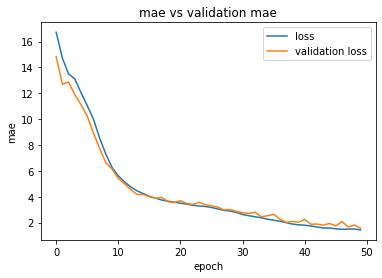

In [48]:
plt.plot(mae, label="loss")
plt.plot(val_mae,label="validation loss")
plt.title('mae vs validation mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

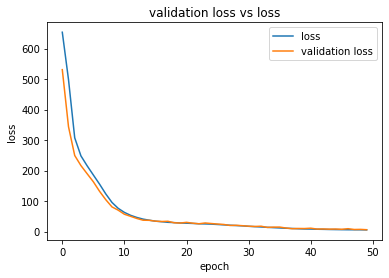

In [49]:
plt.plot(loss, label="loss")
plt.plot(val_loss,label="validation loss")
plt.title('validation loss vs loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show

In [ ]:
model

In [50]:
predict=model.predict(x_test)

In [28]:
for i in range(len(x_test)):
    print("real: ", y_test["tenure"].iloc[i]," Prediction: ", predict[i])

real:  1  Prediction:  [1.7780969]
real:  61  Prediction:  [62.258057]
real:  33  Prediction:  [32.22783]
real:  3  Prediction:  [3.8623831]
real:  23  Prediction:  [25.201113]
real:  3  Prediction:  [3.4475362]
real:  17  Prediction:  [17.853468]
real:  41  Prediction:  [44.444675]
real:  2  Prediction:  [2.7657015]
real:  5  Prediction:  [6.195653]
real:  1  Prediction:  [0.23932976]
real:  9  Prediction:  [9.259431]
real:  2  Prediction:  [4.171835]
real:  24  Prediction:  [26.418186]
real:  26  Prediction:  [25.627445]
real:  42  Prediction:  [44.550274]
real:  6  Prediction:  [5.6673717]
real:  12  Prediction:  [12.402632]
real:  15  Prediction:  [14.930834]
real:  9  Prediction:  [7.1006775]
real:  43  Prediction:  [48.004826]
real:  1  Prediction:  [2.7405677]
real:  53  Prediction:  [50.172825]
real:  4  Prediction:  [4.9308214]
real:  30  Prediction:  [30.940434]
real:  1  Prediction:  [1.5740533]
real:  2  Prediction:  [2.0987506]
real:  26  Prediction:  [26.302933]
real:  40

real:  2  Prediction:  [2.1351929]
real:  14  Prediction:  [13.030199]
real:  16  Prediction:  [17.07834]
real:  2  Prediction:  [2.5115185]
real:  20  Prediction:  [20.88299]
real:  50  Prediction:  [53.350773]
real:  2  Prediction:  [1.373122]
real:  43  Prediction:  [50.964287]
real:  11  Prediction:  [11.878073]
real:  17  Prediction:  [16.520159]
real:  11  Prediction:  [9.250878]
real:  23  Prediction:  [23.238468]
real:  49  Prediction:  [51.431984]
real:  19  Prediction:  [18.938965]
real:  32  Prediction:  [35.42273]
real:  25  Prediction:  [25.83038]
real:  15  Prediction:  [16.849844]
real:  1  Prediction:  [2.0222697]
real:  7  Prediction:  [7.9850245]
real:  11  Prediction:  [12.887611]
real:  16  Prediction:  [15.611195]
real:  2  Prediction:  [2.5374064]
real:  22  Prediction:  [20.039972]
real:  35  Prediction:  [36.824024]
real:  49  Prediction:  [50.503952]
real:  24  Prediction:  [24.479977]
real:  10  Prediction:  [10.706273]
real:  9  Prediction:  [5.043693]
real: 

## Trying a model without TotalCharges 

In [51]:
x_train2=x_train.drop('TotalCharges', axis=1)
x_test2=x_test.drop('TotalCharges', axis=1)

In [52]:
x_train2

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
5957,1,1.695009,1,0,1,0,1,0,0,0,0,0,2,0,0,2,0.154888
5174,0,-0.589967,0,0,1,0,1,0,0,0,0,2,0,0,1,3,0.225807
1339,1,-0.589967,1,0,1,2,1,0,2,2,0,2,2,0,1,1,1.226780
1934,0,-0.589967,0,0,1,0,1,2,2,0,0,0,0,0,1,2,0.177177
1304,1,1.695009,1,0,1,2,1,0,0,0,0,0,2,0,1,0,0.440591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1,-0.589967,0,0,1,2,1,0,0,0,2,2,0,0,1,2,0.643217
6952,0,-0.589967,0,0,1,2,1,0,2,2,0,2,2,0,1,0,1.324041
997,0,1.695009,0,0,1,2,1,0,0,0,0,2,2,0,1,2,0.793160
5120,1,-0.589967,1,1,1,0,0,2,0,0,0,0,0,1,1,2,-1.012239


In [53]:
model2 = Sequential()
model2.add(Dense(8, activation='relu', input_shape=(x_train2.shape[1],)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', metrics='mae', optimizer="adam")

In [54]:
#fit the model
hist2=model2.fit(x_train2, y_train, epochs=50, batch_size=32,validation_data=(x_test2,y_test))

Epoch 1/50
47/47 [==============================] - 0s 3ms/step - loss: 664.3338 - mae: 17.0589 - val_loss: 554.9501 - val_mae: 15.2906
Epoch 2/50
47/47 [==============================] - 0s 1ms/step - loss: 531.8858 - mae: 15.0180 - val_loss: 383.4679 - val_mae: 12.9530
Epoch 3/50
47/47 [==============================] - 0s 1ms/step - loss: 332.7745 - mae: 13.4581 - val_loss: 250.9790 - val_mae: 12.6402
Epoch 4/50
47/47 [==============================] - 0s 1ms/step - loss: 261.9998 - mae: 13.3560 - val_loss: 229.4424 - val_mae: 12.2484
Epoch 5/50
47/47 [==============================] - 0s 1ms/step - loss: 238.2444 - mae: 12.6411 - val_loss: 209.6166 - val_mae: 11.3252
Epoch 6/50
47/47 [==============================] - 0s 1ms/step - loss: 220.4876 - mae: 11.8313 - val_loss: 195.3596 - val_mae: 10.8916
Epoch 7/50
47/47 [==============================] - 0s 1ms/step - loss: 206.1748 - mae: 11.3099 - val_loss: 182.9023 - val_mae: 10.3853
Epoch 8/50
47/47 [==============================

In [55]:
mae2=hist2.history['mae']
val_mae2=hist2.history['val_mae']

loss2=hist2.history['loss']
val_loss2=hist2.history['val_loss']

<function matplotlib.pyplot.show(close=None, block=None)>

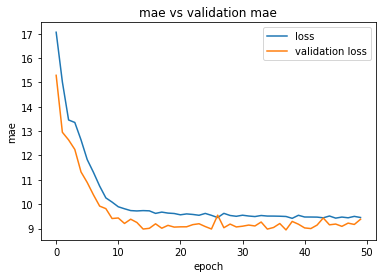

In [56]:
plt.plot(mae2, label="loss")
plt.plot(val_mae2,label="validation loss")
plt.title('mae vs validation mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

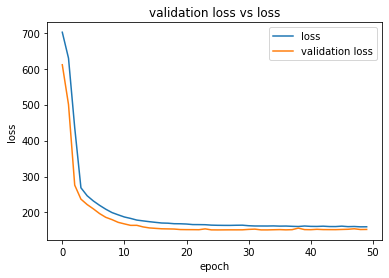

In [35]:
plt.plot(loss2, label="loss")
plt.plot(val_loss2,label="validation loss")
plt.title('validation loss vs loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show

# Création Dataset avec Faker

In [4]:
from faker import Faker
fake=Faker()

In [378]:
data_charges=train[["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling"]]

In [379]:
target=train["MonthlyCharges"]

In [380]:
x_train, x_test, y_train, y_test = train_test_split(data_charges, target ,random_state=454, test_size=0.2)

In [381]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [382]:
regr = RandomForestRegressor(max_depth=42, random_state=454)
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=42, random_state=454)

In [384]:
pred=regr.predict(x_test)

In [385]:
from sklearn.metrics import r2_score

r2_score(pred,y_test)

0.9983598172820194

In [422]:
from sklearn import preprocessing
t = preprocessing.LabelEncoder()
x={}
t.fit(train["gender"])
x['gender']= np.random.choice(t.classes_)

In [445]:
def data(num=1, seed=42):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)
    t = preprocessing.LabelEncoder()
    
   
    output=[]
    for i in range(num):
        x={}
        t.fit(train["gender"])
        x["gender"]=np.random.choice(t.classes_)
        t.fit(train["SeniorCitizen"])
        x["SeniorCitizen"]=np.random.choice(t.classes_)
        t.fit(train["Partner"])
        x["Partner"]=np.random.choice(t.classes_)
        t.fit(train["Dependents"])
        x["Dependents"]=np.random.choice(t.classes_)

        x["tenure"]=np.random.choice(
                    np.arange(0, 72, 1)
                )          
        t.fit(train["PhoneService"])
        x["PhoneService"]=np.random.choice(t.classes_)
        t.fit(train["MultipleLines"])
        x["MultipleLines"]=np.random.choice(t.classes_)
        t.fit(train["InternetService"])
        x["InternetService"]=np.random.choice(t.classes_)
        t.fit(train["OnlineSecurity"])
        x["OnlineSecurity"]=np.random.choice(t.classes_)
        t.fit(train["OnlineBackup"])
        x["OnlineBackup"]=np.random.choice(t.classes_)
        t.fit(train["DeviceProtection"])
        x["DeviceProtection"]=np.random.choice(t.classes_)
        t.fit(train["TechSupport"])
        x["TechSupport"]=np.random.choice(t.classes_)
        t.fit(train["StreamingTV"])
        x["StreamingTV"]=np.random.choice(t.classes_)
        t.fit(train["StreamingMovies"])
        x["StreamingMovies"]=np.random.choice(t.classes_)
        t.fit(train["Contract"])
        x["Contract"]=np.random.choice(t.classes_)
        t.fit(train["PaperlessBilling"])
        x["PaperlessBilling"]=np.random.choice(t.classes_)
        t.fit(train["TechSupport"])
        x["TechSupport"]=np.random.choice(t.classes_)
        t.fit(train["PaymentMethod"])
        x["PaymentMethod"]=np.random.choice(t.classes_)
        output.append(x)

   
    return output

In [446]:
df = pd.DataFrame(data(num=10000, seed=0))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,1,0,67,1,1,1,2,0,2,2,0,0,2,1,3
1,1,0,0,1,37,1,1,0,1,0,0,0,2,0,2,1,1
2,1,1,1,1,14,1,0,1,1,1,0,0,0,2,2,1,2
3,0,0,0,1,5,0,0,0,1,0,1,1,2,0,1,1,1
4,1,0,1,1,46,0,0,2,1,0,1,0,0,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,42,0,0,1,0,2,0,1,0,0,1,1,2
9996,0,1,0,1,64,0,1,2,1,0,2,0,1,1,1,0,3
9997,1,1,0,1,56,0,2,1,1,2,0,0,1,0,0,1,2
9998,0,0,0,1,69,1,0,2,0,0,2,2,0,0,1,0,2


In [449]:
df['MonthlyCharges']=regr.predict(df[["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling"]])
df["TotalCharges"]=df["MonthlyCharges"]*df["tenure"]
df['Churn']=1

In [453]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,67,1,1,1,2,0,2,2,0,0,2,1,3,85.256567,5712.189967,1
1,1,0,0,1,37,1,1,0,1,0,0,0,2,0,2,1,1,56.189408,2079.008080,1
2,1,1,1,1,14,1,0,1,1,1,0,0,0,2,2,1,2,80.632600,1128.856399,1
3,0,0,0,1,5,0,0,0,1,0,1,1,2,0,1,1,1,36.479856,182.399279,1
4,1,0,1,1,46,0,0,2,1,0,1,0,0,0,2,0,3,19.973140,918.764445,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,42,0,0,1,0,2,0,1,0,0,1,1,2,74.798366,3141.531363,1
9996,0,1,0,1,64,0,1,2,1,0,2,0,1,1,1,0,3,19.890062,1272.963976,1
9997,1,1,0,1,56,0,2,1,1,2,0,0,1,0,0,1,2,80.221637,4492.411699,1
9998,0,0,0,1,69,1,0,2,0,0,2,2,0,0,1,0,2,19.890062,1372.414286,1
